# iPython Notebook for Pycon JP 2015 Presentation

In [3]:
%matplotlib inline
import redis
import matplotlib.pyplot as plt

cc_popular = redis.StrictRedis()
print(cc_popular.dbsize())

3561150


In [5]:
for row in cc_popular.keys('17e3f5ff4da952ec9d9f850a571a8d9cf5b1ec69:*:*'):
	s,p,o = row.decode().split(":")
	print(cc_popular.get(p).decode(), cc_popular.get(o).decode())

http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://bibframe.org/vocab/Work
http://bibframe.org/vocab/authorizedAccessPoint jankestevenj1947tinsleyfrederick1951introductiontolinearmodelsandstatisticalinferenceengworktext
http://bibframe.org/vocab/language http://id.loc.gov/vocabulary/languages/eng
http://bibframe.org/vocab/classificationLcc http://id.loc.gov/authorities/classification/QA279
http://bibframe.org/vocab/subject http://catalog.coloradocollege.edu/58052458topic9
http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://bibframe.org/vocab/Text
http://bibframe.org/vocab/workTitle http://catalog.coloradocollege.edu/58052458title5
http://bibframe.org/vocab/contributor http://catalog.coloradocollege.edu/58052458person7
http://bibframe.org/vocab/authorizedAccessPoint Janke, Steven J., 1947- Introduction to linear models and statistical inference / Steven J. Janke, Frederick C. Tinsley.Introduction to linear models and statistical inference
http://bibframe.org/vocab/creator http://

In [37]:
import timeit
redis_setup_stmt = """import redis
cc_popular = redis.StrictRedis()"""
redis_stmt="""cc_popular.keys("17e3f5ff4da952ec9d9f850a571a8d9cf5b1ec69:*:*")"""
redis_trials = []
for count in range(1, 11):
	redis_timer = timeit.timeit(stmt=redis_stmt, setup=redis_setup_stmt, number=count)
	redis_trials.append(redis_timer)


[1.3976355400336615, 1.7649391380764428, 2.172133020068941, 2.5444875704688457, 2.9666830242313154, 3.2388061233286862, 3.7501774181237124, 4.116246406500068, 4.4592888602710445, 4.792335080970588]


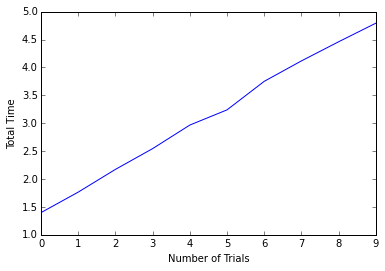

In [38]:
print(redis_trials)
plt.plot(redis_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Trials')
plt.show()

[1.4115560681179886, 2.843541353151977, 4.225981083255647, 5.70634459369785, 7.027007466575924, 8.499200810706498, 10.486195976799536, 11.411789838113236, 12.694518872840945, 14.152809554236683]


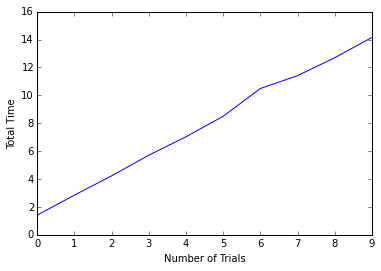

In [27]:
import requests
setup_stmt = """import requests"""
falcon_stmt="""requests.get("http://localhost:18150", data={"s": "http://catalog.coloradocollege.edu/58052458"})"""
falcon_trials = []
for count in range(1,11):
    falcon_timer = timeit.timeit(stmt=falcon_stmt, setup=setup_stmt, number=count)
    falcon_trials.append(falcon_timer)
print(falcon_trials)
plt.plot(falcon_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Trials')
plt.show()

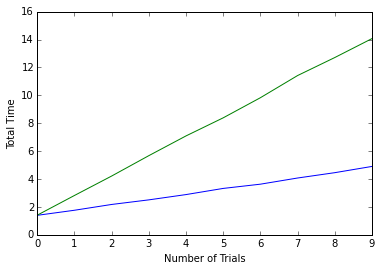

In [13]:
plt.plot(redis_trials)
plt.plot(falcon_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Trials')
plt.show()

[1.4348220744250284, 2.875324189568346, 4.294815513661888, 5.71802245028266, 7.20295987024474, 8.657857275626156, 10.026368495255156, 11.557097466124105, 12.920972437566888, 14.402854882810061]


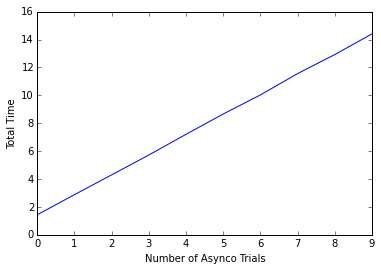

In [35]:
setup_stmt = """import requests"""
asynco_stmt = """requests.get("http://localhost:7000?s=http://catalog.coloradocollege.edu/58052458")"""
asynco_trials = []
for count in range(1,11):
    asynco_timer =  timeit.timeit(stmt=asynco_stmt, setup=setup_stmt, number=count)
    asynco_trials.append(asynco_timer)
print(asynco_trials)
plt.plot(asynco_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Asynco Trials')
plt.show()

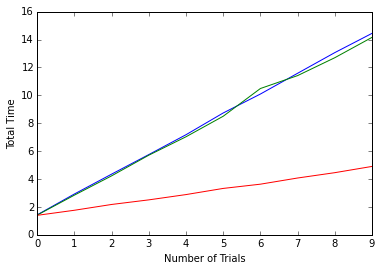

In [29]:
plt.plot(asynco_trials)
plt.plot(falcon_trials)
plt.plot(redis_trials)
plt.ylabel('Total Time')
plt.xlabel('Number of Trials')
plt.show()

In [39]:
redis_timer = timeit.timeit(stmt=redis_stmt, setup=redis_setup_stmt, number=10000)

In [42]:
print(redis_timer/60.0)
print(redis_stmt)

67.4654260765425
cc_popular.keys("17e3f5ff4da952ec9d9f850a571a8d9cf5b1ec69:*:*")


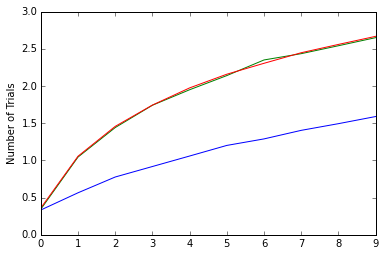

In [36]:
import math
plt.plot([math.log(x) for x in redis_trials])
plt.plot([math.log(x) for x in falcon_trials])
plt.plot([math.log(x) for x in asynco_trials])
plt.ylabel("Log x")
plt.ylabel("Number of Trials")
plt.show()

In [43]:
redis_timer1 = timeit.timeit(stmt=redis_stmt, setup=redis_setup_stmt, number=11)


ConnectionError: Error while reading from socket: (10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)